# Nama : M.Syafiq Prayuda
# NIM : 09011381722089    
# Kelas : SK 5 

# PERANCANGAN SISTEM PERAMALAN BERBASIS LOGIKA FUZZY

    Untuk memperkirakan cuaca dapat menerapkan logika fuzzy dan melakukan pengujian akurasi. Adapun batasan masalah hanya mencakup data perancangan peramalan cuaca berbasis logika fuzzy. Maka yang dijadikan input adalah suhu (0 - 40), kelembaban (0 - 100), dan angin (0 - 15).

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

<font color='blue'>
SKFUZZY yaitu class CONTROL memiliki fungsi ANTECEDENT, yang bisa menghimpun variable INPUT, dan CONSEQUENT , Untuk menghimpun variable OUTPUT. Himpunan ini disimpan dalam Numpy Array dengan fungsi (Start,Stop,Step).

# Fuzzyfikasi

<font color='blue'>
Fuzzyfikasi adalah proses mengubah nilai crisp yang diterima menjadi nilai fuzzy, nilainya diantara 0 dan 1. Dengan memasukkan nilai crisp kedalam himpunan fuzzy.

# Menentukan Semesta Dari Semua Variable

<font color='blue'>
Semesta adalah nilai yang terlibat divariabel fuzzy. Nilai itu kemudian akan dijalankan untuk mendapatkan nilai keanggotaaan himpunan fuzzy.

 <div class="alert alert-success">
<div>
Input : Suhu ada 3 yaitu :
        
   - Dingin (0 - 22)
   - Sedang (23 - 26)
   - Panas (26 - 40)
        
   Kelembaban ada 3 yaitu :
        
   - Lembab (0 - 79)
   - Sedang (80 - 88)
   - Tidak Lembab (88-100)
   
   
         
        
        
Output : Cuaca yang dibagi menjadi 3 yaitu :
        
  - Cuaca besok cerah dengan nilai (0 - 5)
  - Cuaca besok mendung dengan nilai (5 - 20)
  - Cuaca besok hujan dengan nilai (20 - 50)
       

<font color='blue'>
Suhu memiliki rentang nilai 0 - 40

In [2]:
suhu = ctrl.Antecedent(np.arange(0, 40, 1), 'suhu')
suhu_x = np.arange(0, 40, 1) #untuk plot

<font color='blue'>
ANTECEDENT adalah inputnya yang digunakan, dan CONSEQUENT sebagai outputnya. Angka yang ada didalam kurung adalah batas awal, batas akhir, dan kelipatannya (START,STOP,STRIDE).

# Fuzzifikasi Suhu

 <div class="alert alert-success">
<div>
Suhu dibagi menjadi 3 yaitu :
$$ Suhu $$
$$ Dingin = 0 - 22$$
$$ Sedang = 11 - 26$$
$$ Panas = 22 - 40$$


 <div class="alert alert-success">
<div>
Dengan fungsi suhu 

\begin{equation}
  Suhu['Dingin'] = \mu SuhuDingin(x)=\begin{cases}
    1, & \text{$0\leq 22$}.\\
    (22 - x)/(22) , & \text{$11\leq x \leq 22$}.\\
  \end{cases}
  \\
  Suhu['Sedang'] = \mu SuhuSedang(x)=\begin{cases}
    (x - 11)/22 - 11) , & \text{$11 \leq x \leq 22$}.\\
    (26 - x)/(26 - 22) , & \text{$22 \leq x \geq 26$}.\\
  \end{cases}
  \\
    Suhu['Panas'] = \mu SuhuPanas(x)=\begin{cases}
    (x - 22)/(40 -22) , & \text{$22 \leq x \leq 40$}.\\
    1 , & \text{$ x \geq 40$}.\\
  \end{cases}
\end{equation}

In [3]:
suhu['dingin'] = fuzz.trapmf(suhu.universe, [0, 0, 11, 22])
suhu['sedang'] = fuzz.trimf(suhu.universe, [11, 22, 26])
suhu['panas'] = fuzz.trapmf(suhu.universe, [22, 26, 40, 40])

# PLOTTING MEMBERSHIP FUNCTION SUHU

<font color='blue'>
Plotting fungsi keanggotaan $\mu SuhuDingin(x)$

Text(0.5, 1.0, 'suhu_dingin')

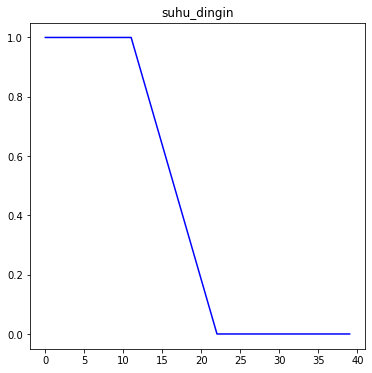

In [4]:
suhu_dingin = fuzz.trapmf(suhu_x,[0, 0, 11,22])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_dingin, 'blue')
ax0.set_title('suhu_dingin')

<font color='blue'>
Plotting fungsi keanggotaan $\mu SuhuSedang(x)$

Text(0.5, 1.0, 'suhu_sedang')

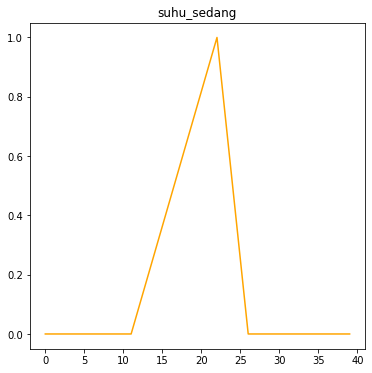

In [5]:
suhu_sedang = fuzz.trimf(suhu_x,[11,22,26])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_sedang, 'orange')
ax0.set_title('suhu_sedang')

<font color='blue'>
Plotting fungsi keanggotaan $\mu SuhuPanas(x) $

Text(0.5, 1.0, 'suhu_panas')

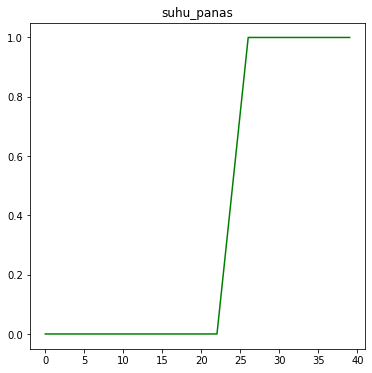

In [6]:
suhu_panas = fuzz.trapmf(suhu_x,[22, 26, 40, 40])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_panas,'green')
ax0.set_title('suhu_panas')

<font color='blue'>
Plotting ke empat fungsi keanggotaan suhu

C:\Users\user\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


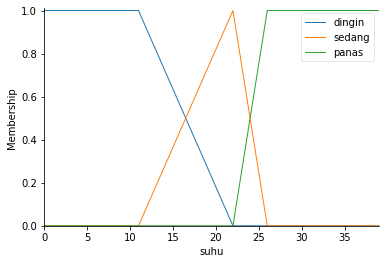

In [7]:
suhu.view()

# Fuzzifikasi Kelembaban

In [8]:
kelembaban = ctrl.Antecedent(np.arange(0, 100, 1), 'kelembaban')
kelembaban_x = np.arange(0,100,1)

<font color='blue'>
ANTECEDENT adalah inputnya yang digunakan, dan CONSEQUENT sebagai outputnya. Angka yang ada didalam kurung adalah batas awal, batas akhir, dan kelipatannya (START,STOP,STRIDE).

 <div class="alert alert-success">
<div>
Kelembaban dibagi menjadi 3 yaitu :
$$ Kelembaban $$
$$ Lembab = 0 - 79$$
$$ Sedang = 39 - 88$$
$$ TidakLembab = 79 - 100$$


 <div class="alert alert-success">
<div>
Dengan fungsi keanggotaan suhu udara

\begin{equation}
  Kelembaban['Lembab'] = \mu Lembab(x)=\begin{cases}
    1, & \text{$x\leq 79$}.\\
    (79 - x)/(79) , & \text{$ 0\leq x \leq 79$}.\\
    \end{cases}
  \\
  Kelembaban['Sedang'] = \mu KelembabanSedang(x)=\begin{cases}
    (x - 39)/79 - 39) , & \text{$39 \leq x \leq 79$}.\\
    (88 - x)/(88 - 79) , & \text{$79 \leq x \geq 88$}.\\
  \end{cases}
  \\
    Kelembaban['TidakLembab'] = \mu KelembabanTidakLembab(x)=\begin{cases}
    (x - 79)/(100 -79) , & \text{$79 \leq x \leq 100$}.\\
    1 , & \text{$ x \geq 100$}.\\
  \end{cases}
\end{equation}

In [9]:
kelembaban['lembab'] = fuzz.trapmf(kelembaban.universe, [0, 0, 39, 79])
kelembaban['sedang'] = fuzz.trimf(kelembaban.universe, [39, 79, 88])
kelembaban['tidaklembab'] = fuzz.trapmf(kelembaban.universe, [79, 88, 100, 100])

<font color='blue'>
Plotting fungsi keanggotaan $\mu kelembabanlembab(x)$

Text(0.5, 1.0, 'kelembaban lembab')

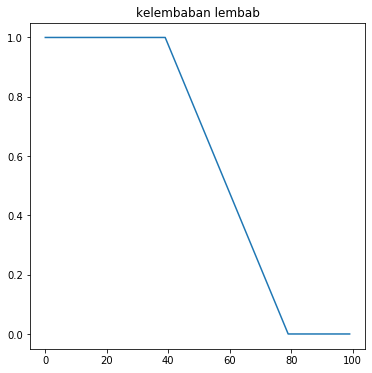

In [10]:
kelembaban_lembab = fuzz.trapmf(kelembaban_x,[0,0,39,79])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kelembaban_x,kelembaban_lembab)
ax0.set_title('kelembaban lembab')

<font color='blue'>
Plotting fungsi keanggotaan $\mu kelembabansedang(x)$

Text(0.5, 1.0, 'kelembaban sedang')

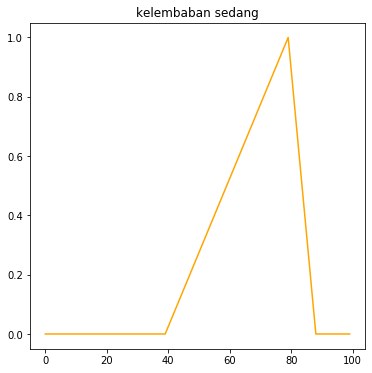

In [11]:
kelembaban_sedang = fuzz.trimf(kelembaban_x,[39,79,88])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kelembaban_x,kelembaban_sedang,'orange')
ax0.set_title('kelembaban sedang')

<font color='blue'>
Plotting fungsi keanggotaan $\mu kelembabantidaklembab(x)$

Text(0.5, 1.0, 'kelembaban tidaklembab')

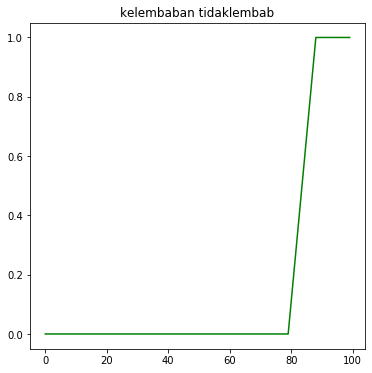

In [12]:
kelembaban_tidaklembab = fuzz.trapmf(kelembaban_x,[79,88,100,100])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kelembaban_x,kelembaban_tidaklembab,'green')
ax0.set_title('kelembaban tidaklembab')

<font color='blue'>
Plotting ke empat fungsi keanggotaan suhu

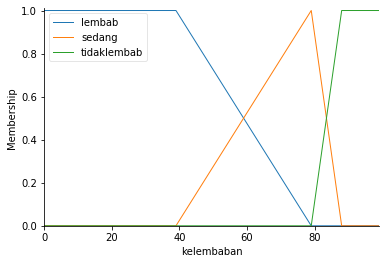

In [13]:
kelembaban.view()

# Fuzzifikasi Cuaca

In [14]:
cuaca = ctrl.Consequent(np.arange(0,50,1), 'cuaca')
cuaca_x = np.arange(0,50,1)

<font color='blue'>
CONSEQUENT sebagai outputnya. Angka yang ada didalam kurung adalah batas awal, batas akhir, dan kelipatannya (START,STOP,STRIDE).

 <div class="alert alert-success">
<div>
Cuaca dibagi menjadi 3 yaitu :
$$ cuaca $$
$$ cerah = 0 - 5$$
$$ mendung = 3 - 20$$
$$ hujan = 5 - 50$$

 <div class="alert alert-success">
<div>
Dengan fungsi keanggotaan cuaca

\begin{equation}
  cuaca['cerah'] = \mu cuacacerah(x)=\begin{cases}
    1, & \text{$x\leq 5$}.\\
    (5 - x)/(5) , & \text{$ 0\leq x \leq 5$}.\\
  \end{cases}
  \\
  cuaca['mendung'] = \mu cuacamendung(x)=\begin{cases}
    (x - 3)/5 - 3) , & \text{$3 \leq x \leq 5$}.\\
    (20 - x)/(20 - 5) , & \text{$5 \leq x \geq 20$}.\\
  \end{cases}
  \\
    cuaca['hujan'] = \mu cuacahujan(x)=\begin{cases}
    (x - 5)/(50 -5) , & \text{$5 \leq x \leq 50$}.\\
    1 , & \text{$ x \geq 50$}.\\
  \end{cases}
\end{equation}

In [15]:
cuaca['cerah'] = fuzz.trapmf(cuaca.universe, [0, 0, 3, 5])
cuaca['mendung'] = fuzz.trimf(cuaca.universe, [3, 5, 20])
cuaca['hujan'] = fuzz.trapmf(cuaca.universe, [5, 20, 50, 50])

<font color='blue'>
Plotting fungsi keanggotaan $\mu cuacacerah(x)$

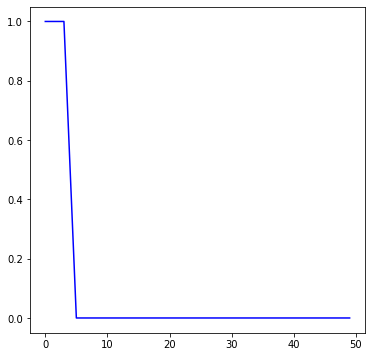

In [16]:
cuaca_cerah = fuzz.trapmf(cuaca_x,[0,0,3,5])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(cuaca_x,cuaca_cerah,'blue')

<font color='blue'>
Plot fungsi keanggotaan $\mu cuacamendung(x) $

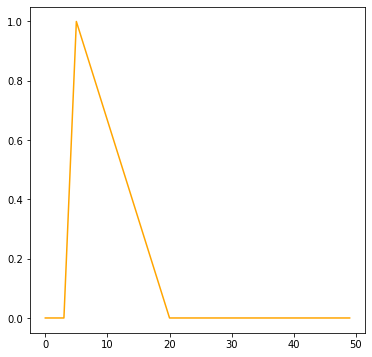

In [17]:
cuaca_mendung = fuzz.trimf(cuaca_x,[3,5,20])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(cuaca_x,cuaca_mendung,'orange')

<font color='blue'>
Plot fungsi keanggotaan $\mu cuacahujan(x) $

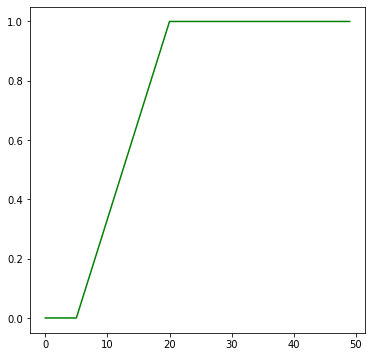

In [18]:
cuaca_hujan = fuzz.trapmf(cuaca_x,[5,20,50,50])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(cuaca_x,cuaca_hujan,'green')

<font color='blue'>
Plotting 3 fungsi keanggotaan cuaca

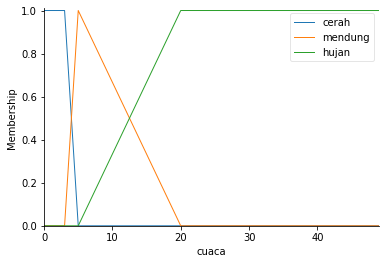

In [19]:
cuaca.view()

# INFERENCING


<font color='blue'>
Pada tahap inferencing, membuat aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

<font color='blue'>
Sistem ini berdasarkan jumlah fuzzifikasi dari variabel suhu yang berjumlah 3 dan fuzzifikasi dari variabel kelembaban yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

<font color='blue'>
    
1. IF suhu dingin dan kelembaban lembab THEN cuaca hujan
2. IF suhu sedang dan kelembaban lembab THEN cuaca hujan
3. IF suhu panas dan kelembaban lembab THEN cuaca hujan

4. IF suhu dingin dan kelembaban sedang THEN cuaca mendung
5. IF suhu sedang dan kelembaban sedang THEN cuaca mendung
6. IF suhu panas dan kelembaban sedang THEN cuaca mendung

7. IF suhu dingin dan kelembaban tidaklembab THEN cuaca cerah
8. IF suhu sedang dan kelembaban tidaklembab THEN cuaca cerah
9. IF suhu panas dan kelembaban tidaklembab THEN cuaca cerah

In [20]:
rule1 = ctrl.Rule(suhu['dingin'] & kelembaban['lembab'] , cuaca['hujan'])
rule2 = ctrl.Rule(suhu['sedang'] & kelembaban['lembab'] , cuaca['hujan'])
rule3 = ctrl.Rule(suhu['panas'] & kelembaban['lembab'] , cuaca['hujan'])

rule4 = ctrl.Rule(suhu['dingin'] & kelembaban['sedang'] , cuaca['mendung'])
rule5 = ctrl.Rule(suhu['sedang'] & kelembaban['sedang'] , cuaca['mendung'])
rule6 = ctrl.Rule(suhu['panas'] & kelembaban['sedang'] , cuaca['mendung'])

rule7 = ctrl.Rule(suhu['dingin'] & kelembaban['tidaklembab'] , cuaca['cerah'])
rule8 = ctrl.Rule(suhu['sedang'] & kelembaban['tidaklembab'] , cuaca['cerah'])
rule9 = ctrl.Rule(suhu['panas'] & kelembaban['tidaklembab'] , cuaca['cerah'])

# RULE EVALUATION

In [21]:
ramal_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# DEFUZZIFIKASI

In [22]:
ramall = ctrl.ControlSystemSimulation(ramal_ctrl)

<font color='blue'>
Suhu akan kita masukan 25 dan kelembaban 83

In [23]:
ramall.input['suhu'] = 25
ramall.input['kelembaban'] = 83

<font color='blue'>
Perhitungan Defuzzifikasi

In [24]:
ramall.compute()

<font color='blue'>
Mencetak Hasil Output Defuzzifikasi

In [25]:
print(ramall.output['cuaca'])

8.40983651300527


<font color='blue'>
Plotting Fungsi Keangggotaan Suhu Setelah Dimasukkan Input Nilai Pada Suhu

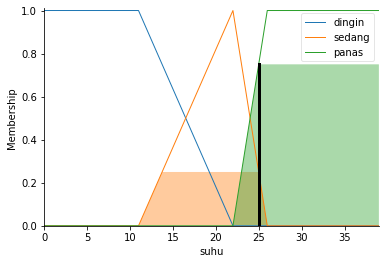

In [26]:
suhu.view(sim=ramall)

<font color='blue'>
Plotting Fungsi Keangggotaan Suhu Setelah Dimasukkan Input Nilai Pada Kelembaban

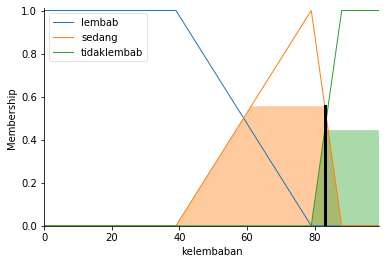

In [27]:
kelembaban.view(sim=ramall)

<font color='blue'>
Plotting Fungsi Keangggotaan Cuaca Setelah Dilakukan Perhitungan Defuzzifikasi Output Nilai Pada Cuaca

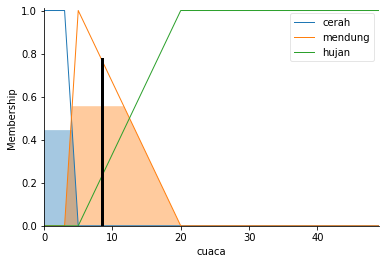

In [28]:
cuaca.view(sim=ramall)

# PERHITUNGAN MANUAL

 <div class="alert alert-success">
<div>
\begin{equation}
  Suhu = 25\\
  Masukkan\,nilai\,suhu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,suhu\\
  Suhu['Dingin'] = \mu SuhuDingin(x)=\begin{cases}
    1, & \text{$x\leq 22$}.\\
    (22 - x)/(22) , & \text{$ 0\leq x \leq 22$}.\\
  \end{cases}
  \\
  Suhu['Sedang'] = \mu SuhuSedang(x)=\begin{cases}
    (x - 11)/22 - 11) , & \text{$11 \leq x \leq 22$}.\\
    (26 - x)/(26 - 22) , & \text{$22 \leq x \geq 26$}.\checkmark\\
  \end{cases}
  \\
    Suhu['Panas'] = \mu SuhuPanas(x)=\begin{cases}
    (x - 22)/(40 -22) , & \text{$22 \leq x \leq 40$}.\checkmark\\
    1 , & \text{$ x \geq 40$}.\\
  \end{cases}
\end{equation}

 <div class="alert alert-success">
<div>
\begin{equation}
    \mu SuhuSedang(25) = (26 - 25) / (26 - 22) \\
    \mu SuhuSedang(25) = 1/4 \\ 
    \mu SuhuSedang(25) = 0.25 \\
    \mu SuhuPanas(25) = (25 - 22) / (40-22) \\
    \mu SuhuPanas(25) = 3/8 \\
    \mu SuhuPanas(25) = 0.375 \\
\end{equation}

 <div class="alert alert-success">
<div>
\begin{equation}
    Kelembaban = 83\\
  Kelembaban['Lembab'] = \mu Lembab(x)=\begin{cases}
    1, & \text{$x\leq 79$}.\\
    (79 - x)/(79) , & \text{$ 0\leq x \leq 79$}.\\
  \end{cases}
  \\
  Kelembaban['Sedang'] = \mu KelembabanSedang(x)=\begin{cases}
    (x - 39)/79 - 39) , & \text{$39 \leq x \leq 79$}.\\
    (88 - x)/(88 - 79) , & \text{$79 \leq x \geq 88$}.\checkmark\\
  \end{cases}
  \\
    Kelembaban['TidakLembab'] = \mu KelembabanTidakLembab(x)=\begin{cases}
    (x - 79)/(100 -79) , & \text{$79 \leq x \leq 100$}.\checkmark\\
    1 , & \text{$ x \geq 100$}.\\
  \end{cases}
\end{equation}

 <div class="alert alert-success">
<div>
\begin{equation}
    \mu KelembabanSedang(83) = (88 - 83) / (88 - 79) \\
    \mu KelembabanSedang(83) = 5/9 \\ 
    \mu KelembabanSedang(83) = 0.55 \\
    \mu KelembabanTidakLembab(83) = (83 - 79) / (100-79) \\
    \mu KelembabanTidakLembab(83) = 4/21 \\
    \mu KelembabanTidakLembab(83) = 0.1904 \\
\end{equation}

 <div class="alert alert-success">
<div>
Cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF Suhu Dingin AND Kelembaban Lembab THEN Cuaca Hujan

$$ \\ \alpha(predikat_1) = \mu SuhuDingin \cap \mu KelembabanLembab $$
$$\alpha(predikat_1)   = min (\mu SuhuDingin[25], \mu KelembabanLembab[83]) $$
$$ \alpha(predikat_1) = min (0; 0) $$
$$ \alpha(predikat_1) = 0 $$

Kemudian lihat himpunan Cuaca Hujan 
$$
   Cuaca['Hujan'] = \mu(x)=\begin{cases}
    (x - 5)/(50 -5) , & \text{$5 \leq x \leq 50$}.\\
    1 , & \text{$ x \geq 50$}.\\
  \end{cases}
 $$
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 IF Suhu Sedang AND Kelembaban Lembab THEN Cuaca Hujan

$$ \\ \alpha(predikat_2) = \mu SuhuSedang \cap \mu KelembabanLembab $$
$$\alpha(predikat_2)   = min (\mu SuhuSedang[25], \mu KelembabanLembab[83]) $$
$$ \alpha(predikat_2) = min (0; 0) $$
$$ \alpha(predikat_2) = 0 $$

Kemudian lihat himpunan Cuaca Hujan
$$
   Cuaca['Hujan'] = \mu(x)=\begin{cases}
    (x - 5)/(50 -5) , & \text{$5 \leq x \leq 50$}.\\
    1 , & \text{$ x \geq 50$}.\\
  \end{cases}
$$

Maka nilai $ Z_2 = 0 $

=================================================================================================================

3 IF Suhu Panas AND Kelembaban Lembab THEN Cuaca Hujan

$$ \\ \alpha(predikat_3) = \mu SuhuPanas \cap \mu KelembabanLembab $$
$$\alpha(predikat_3)   = min (\mu SuhuPanas[25], \mu KelembabanLembab[83]) $$
$$ \alpha(predikat_3) = min (0.375; 0) $$
$$ \alpha(predikat_3) = 0.375 $$

Kemudian lihat himpunan Cuaca Hujan
$$
 Cuaca['Hujan'] = \mu(x)=\begin{cases}
    (x - 5)/(50 -5) , & \text{$5 \leq x \leq 50$}.\\
    1 , & \text{$ x \geq 50$}.\\
  \end{cases}
$$

Maka nilai $ Z_3 = 0 $


=================================================================================================================

4 IF Suhu Dingin dan Kelembaban Sedang THEN Durasi Cuaca Mendung

$$ \\ \alpha(predikat_4) = \mu SuhuDingin \cap \mu KelembabanSedang $$
$$\alpha(predikat_4)   = min (\mu SuhuDingin[25], \mu KelembabanSedang[83]) $$
$$ \alpha(predikat_4) = min (0; 0.55) $$
$$ \alpha(predikat_4) = 0 $$

Kemudian lihat himpunan Cuaca Mendung
$$ Cuaca['Mendung'] = \mu(x)=\begin{cases}
    (x - 3)/5 - 3) , & \text{$3 \leq x \leq 5$}.\\
    (20 - x)/(20 - 5) , & \text{$5 \leq x \geq 20$}.\\
  \end{cases}
$$

Maka nilai $ Z_4 = 0 $


=================================================================================================================

5 IF Suhu Sedang dan Kelembaban Sedang THEN Cuaca Mendung

$$ \\ \alpha(predikat_5) = \mu SuhuSedang \cap \mu KelembabanSedang $$
$$\alpha(predikat_5)   = min (\mu SuhuSedang[25], \mu KelembabanSedang[83]) $$
$$ \alpha(predikat_5) = min (0.25; 0.55) $$
$$ \alpha(predikat_5) = 0.45 $$

Kemudian lihat himpunan Cuaca Mendung
$$ Cuaca['Mendung'] = \mu(x)=\begin{cases}
    (x - 3)/5 - 3) , & \text{$3 \leq x \leq 5$}.\\
    (20 - x)/(20 - 5) , & \text{$5 \leq x \geq 20$}.\\
  \end{cases}
$$

Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(x- 3) / (5 - 3) = 0.45 $$
 $$ x - 3 = 0.45 \times 2 $$
 $$ x - 3 = 0.9 $$
 $$ x = 3.9 $$
 
 $$ (20 -x) / (20 -5) = 0.45 $$
 $$ 20 - x = 0.45 \times 15$$
 $$ 20 - x = 6.75 $$
 $$ - x = -13.25 $$
 $$ x = 13.25 $$
Akan diambil nilai terkecil
Maka nilai $ Z_5 = 3.9 $

=================================================================================================================

6 IF Suhu Panas dan Kelembaban Sedang THEN Cuaca Mendung

$$ \\ \alpha(predikat_6) = \mu SuhuPanas \cap \mu KelembabanSedang $$
$$\alpha(predikat_6)   = min (\mu SuhuPanas[25], \mu KelembabanSedang[83]) $$
$$ \alpha(predikat_6) = min (0.375; 0.55) $$
$$ \alpha(predikat_6) = 0.68 $$

Kemudian lihat himpunan Cuaca Mendung
$$
    Cuaca['Mendung'] = \mu(x)=\begin{cases}
    (x - 3)/5 - 3) , & \text{$3 \leq x \leq 5$}.\\
    (20 - x)/(20 - 5) , & \text{$5 \leq x \geq 20$}.\\
  \end{cases}
$$

Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(x- 3) / (5 - 3) = 0.68 $$
 $$ x - 3 = 0.68 \times 2 $$
 $$ x - 3 = 1.36 $$
 $$ x = 4.36 $$
 
 $$ (20 -x) / (20 -5) = 0.68 $$
 $$ 20 - x = 0.68 \times 15$$
 $$ 20 - x = 10.2 $$
 $$ - x = -9.8 $$
 $$ x = 9.8 $$
Akan diambil nilai terkecil
Maka nilai $ Z_6 = 4.36 $

=================================================================================================================

7 IF Suhu Dingin dan Kelembaban Tidak Lembab THEN Cuaca Cerah
$$ \\ \alpha(predikat_7) = \mu SuhuDingin \cap \mu KelembabanTidakLembab $$
$$\alpha(predikat_7)   = min (\mu SuhuDingin[25], \mu KelembabanTidakLembab[83]) $$
$$ \alpha(predikat_7) = min (0; 0.1904) $$
$$ \alpha(predikat_7) = 0 $$

Kemudian lihat himpunan Cuaca Cerah

$$
   Cuaca['Cerah'] = \mu CuacaCerah(x)=\begin{cases}
    1, & \text{$x\leq 5$}.\\
    (5 - x)/(5) , & \text{$ 0\leq x \leq 5$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_7$ = 0

=================================================================================================================

8 IF Suhu Sedang dan Kelembaban Tidak Lembab THEN Cuaca Cerah
$$ \\ \alpha(predikat_8) = \mu SuhuSedang \cap \mu KelembabanTidakLembab $$
$$\alpha(predikat_8)   = min (\mu SuhuSedang[25], \mu KelembabanTidakLembab[83]) $$
$$ \alpha(predikat_8) = min (0.25; 0.1904) $$
$$ \alpha(predikat_8) = 0.0475 $$

Kemudian lihat himpunan Cuaca Cerah
$$
  \\
   Cuaca['Cerah'] = \mu(x)=\begin{cases}
    1, & \text{$x\leq 5$}.\\
    (5 - x)/(5) , & \text{$ 0\leq x \leq 5$}.\\
  \end{cases}
  \\
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(5-x) / (5) = 0.0475 \\
(5-x) = 0.2375 \\
-x = -0.2375\\
x = 4.765 \\
$$

Maka nilai Z$_8$ = 4.765

=================================================================================================================

9 IF Suhu Panas dan Kelembaban Tidak Lembab THEN Cuaca Cerah
$$ \\ \alpha(predikat_9) = \mu SuhuPanas \cap \mu KelembabanTidakLembab $$
$$\alpha(predikat_9)   = min (\mu SuhuPanas[25], \mu KelembabanTidakLembab[83]) $$
$$ \alpha(predikat_9) = min (0.375; 0.1904) $$
$$ \alpha(predikat_9) = 0.07125 $$

Kemudian lihat himpunan Durasi Sangat Cepat
$$ Cuaca['Cerah'] = \mu(x)=\begin{cases}
    1, & \text{$x\leq 5$}.\\
    (5 - x)/(5) , & \text{$ 0\leq x \leq 5$}.\\
  \end{cases}
  \\
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(5-x) / (5) = 0.07125 \\
(5-x) = 0.35625 \\
-x = -0.35625\\
x = 4.64375 \\
$$

Maka nilai Z$_9$ = 4.64375

<font color='blue'>
Dari sini kita dapat mencari nilai z, yaitu :

 <div class="alert alert-success">
<div>
 Z =
$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_1 +
\alpha predikat_1\,_1 \times Z_1\,_2 +
\alpha predikat_1\,_2 \times Z_1\,_2 +}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 +
\alpha predikat_1\,_1 + \alpha predikat_1\,_2}$$

 <div class="alert alert-success">
<div>
$$Z = \frac{0 + 0 + 0 + 0 + 1 \times 4 + 1 \times 4.5 + 0 + 0.05 \times 5 + 0.1 \times 5}{0 + 0 + 0 + 0 + 0.45 + 0.68 + 0 + 0.0475 + 0.07125} $$
 
 $$ Z = \frac{4 + 4.5 + 0.25 + 0.5}{1.24875} $$
 $$ Z = 7.407407407407407 $$

<font color='blue'>
Output yang dihasilkan menggunakan code python sebesar 8.40983651300527, sedangkan perhitungan manual sebesar 7.407407407407407.

Terdapat perbedaan sebesar 1.002429105597863‬

# Referensi Paper

    Jurnal Media Infotama Vol. 12 No. 1, Februari 2016
    Perancangan Sistem Peramalan… ISSN 1858 – 2680
    PERANCANGAN SISTEM PERAMALAN CUACA
    BERBASIS LOGIKA FUZZY
    Ema Sastri Puspita, Liza Yulianti